# Retrieveing the Dataset

In [1]:
!wget http://cb.lk/covid_19

--2021-09-29 13:27:52--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-09-29 13:27:52--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-09-29 13:27:53--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-09

In [7]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

# Importing the Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.preprocessing import image
from keras.models import Sequential

# CNN MODEL


In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0

# Training and Testing Data

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1/255)


training_set = train_datagen.flow_from_directory(
        'CovidDataset/Train',
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'CovidDataset/Val',
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')



Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [9]:
model.fit_generator(training_set,steps_per_epoch=8,epochs=10,validation_steps=2,validation_data=test_set,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 52s 6s/step - loss: 1.3725 - accuracy: 0.4688 - val_loss: 0.6886 - val_accuracy: 0.5938
Epoch 2/10
8/8 [==============================] - 49s 6s/step - loss: 0.6914 - accuracy: 0.5391 - val_loss: 0.6879 - val_accuracy: 0.4375
Epoch 3/10
8/8 [==============================] - 49s 6s/step - loss: 0.6468 - accuracy: 0.6641 - val_loss: 0.6023 - val_accuracy: 0.7500
Epoch 4/10
8/8 [==============================] - 49s 6s/step - loss: 0.5418 - accuracy: 0.6953 - val_loss: 0.5105 - val_accuracy: 0.9688
Epoch 5/10
8/8 [==============================] - 49s 6s/step - loss: 0.4412 - accuracy: 0.8047 - val_loss: 0.3537 - val_accuracy: 0.8438
Epoch 6/10
8/8 [==============================] - 49s 6s/step - loss: 0.4452 - accuracy: 0.7812 - val_loss: 0.4980 - val_accuracy: 0.9062
Epoch 7/10
8/8 [==============================] - 49s 6s/step - loss: 0.3711 - accuracy: 0.8594 - val_loss: 0.2409 - val_accuracy: 0.9062
Epoch 8/10
8/8 [==================

# Predicting the Model by Image

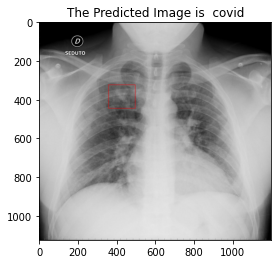

In [10]:
%matplotlib inline
import matplotlib.image as mpimg

img=mpimg.imread('/content/CovidDataset/Train/Covid/16672_1_1.jpg')
imgplot = plt.imshow(img)

test_image = image.load_img('/content/CovidDataset/Train/Covid/16672_1_1.jpg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    

plt=plt.title('The Predicted Image is  '+ prediction )

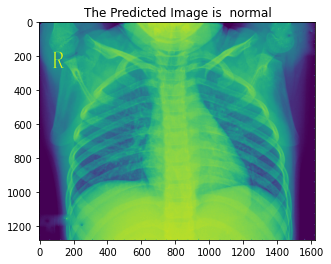

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img=mpimg.imread('/content/CovidDataset/Val/Normal/NORMAL2-IM-0790-0001.jpeg')
imgplot = plt.imshow(img)

test_image = image.load_img('/content/CovidDataset/Val/Normal/NORMAL2-IM-0790-0001.jpeg', target_size = (256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)


if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
plt=plt.title('The Predicted Image is  '+ prediction )